In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
# 1. Generate a sample 3D dataset
# We create a synthetic dataset with 3 features (dimensions)
np.random.seed(42)
X_3d = np.random.rand(100, 3)
# Add some correlation to make PCA meaningful
X_3d[:, 0] = X_3d[:, 0] * 2 + X_3d[:, 1]
X_3d[:, 2] = X_3d[:, 2] * 0.5 - X_3d[:, 1]

In [8]:
# 2. Standardize the data
# It is a critical first step as PCA is sensitive to the scale of features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_3d)

In [9]:
# 3. Apply PCA to reduce to 2 components
# Initialize PCA with n_components=2 to get 2 principal components.
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_2d = pca.fit_transform(X_scaled)

In [10]:
# 4. Analyze the explained variance (optional but recommended)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.2f}")

Explained variance by PC1 and PC2: [0.76668315 0.20274329]
Total explained variance: 0.97


In [11]:
# 5. Display the original and reduced data shapes
print(f"\nOriginal shape: {X_3d.shape}")
print(f"Reduced shape: {X_2d.shape}")


Original shape: (100, 3)
Reduced shape: (100, 2)


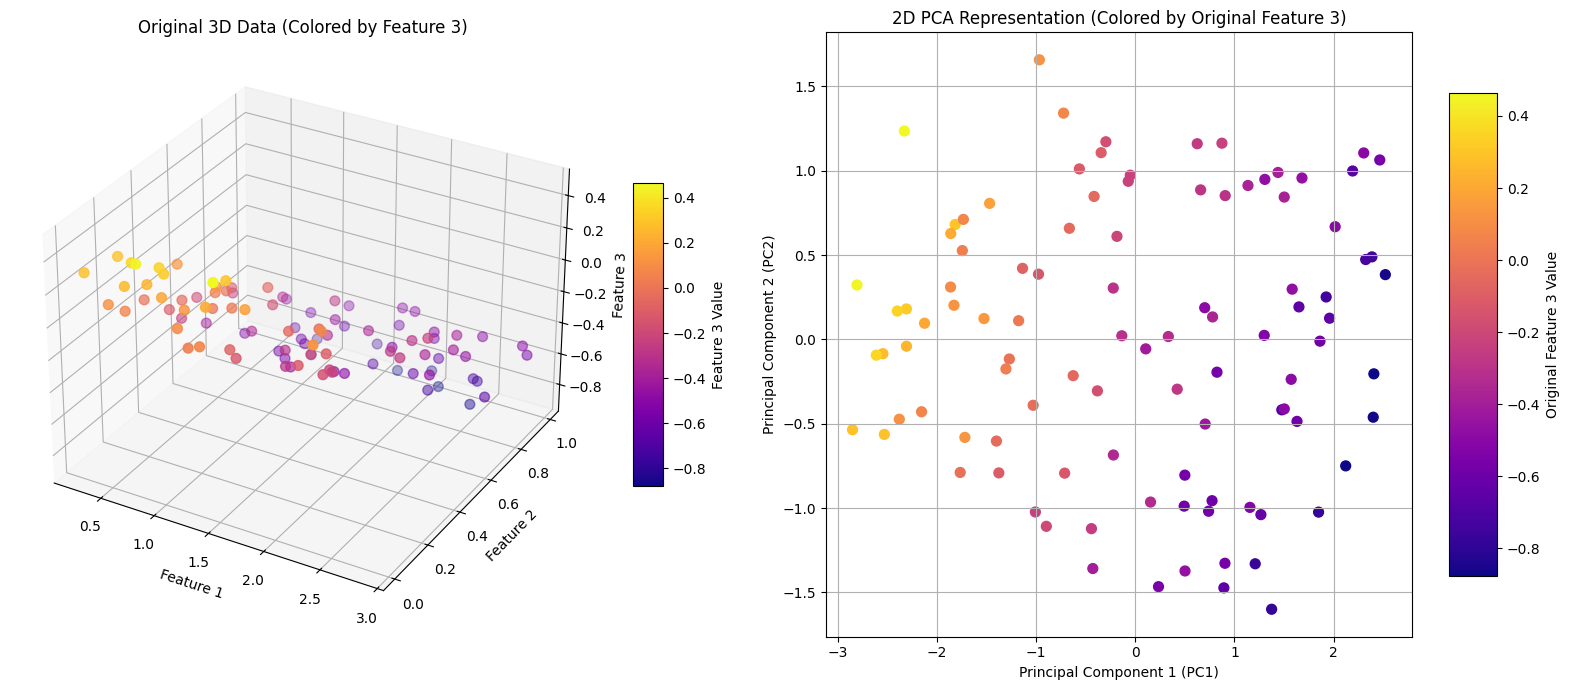

In [13]:
# 6. Visualize the 3D original data and 2D PCA results for comparison

fig = plt.figure(figsize=(16, 7))

# Subplot 1: Original 3D data, colored by Feature 3
ax1 = fig.add_subplot(121, projection='3d') # 1 row, 2 columns, 1st subplot
scatter1 = ax1.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=X_3d[:, 2], cmap='plasma', s=50)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('Original 3D Data (Colored by Feature 3)')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=10, label='Feature 3 Value')

# Subplot 2: 2D PCA representation, colored by original Feature 3
# We use the original Feature 3 for coloring to see how it's preserved/represented in 2D
ax2 = fig.add_subplot(122) # 1 row, 2 columns, 2nd subplot
scatter2 = ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=X_3d[:, 2], cmap='plasma', s=50)
ax2.set_xlabel('Principal Component 1 (PC1)')
ax2.set_ylabel('Principal Component 2 (PC2)')
ax2.set_title('2D PCA Representation (Colored by Original Feature 3)')
ax2.grid(True)
fig.colorbar(scatter2, ax=ax2, shrink=0.8, aspect=10, label='Original Feature 3 Value')

plt.tight_layout()
plt.show()